In [1]:
import pandas as pd

In [2]:
stellar = pd.read_csv('star_classification.csv')

In [3]:
stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Data Dictionary
#### The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.
##### From Kaggle
1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation



Citation
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

In [4]:
stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
stellar.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


##### - Selecting Features of interest, assuming that there were no anomalies in the hardware. Basic outlier treatment will be done but no anomaly/flaw detection using the hardware data. As per my understanding, that would be another project to be carried out before using the data for classification. 
##### - Also, all the other features available do not necessarily pertain to the characteristics of these stellar objects. Even though they might provide some information for classification, that would not be ideal for the context here.

In [7]:
features = ["u","g","r","i","z","redshift"]

In [8]:
stellar[features].describe()

,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


- Clear outliers present in u, g and z, and maybe in redshift

A deeper dive into the quantiles for these features

In [9]:
stellar["u"].quantile([x/100 for x in range(0,5)])

0.00   -9999.000000
0.01      17.142674
0.02      17.642929
0.03      17.964447
0.04      18.215315
Name: u, dtype: float64

In [10]:
stellar["g"].quantile([x/100 for x in range(0,5)])

0.00   -9999.000000
0.01      15.829114
0.02      16.313735
0.03      16.618918
0.04      16.868757
Name: g, dtype: float64

In [11]:
stellar["z"].quantile([x/100 for x in range(0,5)])

0.00   -9999.000000
0.01      14.663328
0.02      15.120837
0.03      15.404867
0.04      15.608767
Name: z, dtype: float64

In [12]:
stellar["redshift"].quantile([x/1000 for x in range(990,1000)])

0.990    3.127080
0.991    3.171042
0.992    3.225196
0.993    3.285415
0.994    3.393549
0.995    3.587091
0.996    3.813278
0.997    4.101321
0.998    5.136565
0.999    6.277427
Name: redshift, dtype: float64

From the above quantiles it can be concluded that almost all the values for u,g and z are positive and the outliers seem to be anomalies in the information capture/processing.

For redshift although 99 percent of the values are below 3, there is consistent increase in values till the max. 

In [13]:
## Removing the outliers from these three features i.e. any negative values 

stellar = stellar[stellar["u"] > 0]
stellar = stellar[stellar["g"] > 0]
stellar = stellar[stellar["z"] > 0]

In [14]:
stellar[features].describe()

,u,g,r,i,z,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [15]:
stellar[["alpha", "delta"]].describe()

,alpha,delta
count,99999.000000,99999.000000
mean,177.628653,24.135552
std,96.502612,19.644608
min,0.005528,-18.785328
25%,127.517698,5.147477
50%,180.900527,23.646462
75%,233.895005,39.901582
max,359.999810,83.000519


In [16]:
# Checking for number of observations with negative delta
len(stellar[stellar["delta"] <0])

12060

Dropping the negative delta values. Another way of handling this could be adding 360 but more knowledge of data is required to make that assumption. 

In [34]:
# Filtering for number of observations with positive delta
stellar = stellar[stellar["delta"] > 0]

In [18]:
stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741


In [19]:
## Function to plot violing and visualize the distribution of the feature of interest

def violin_plotter(by, variable, data):
    fig = plt.figure(figsize = (12,8))
    if by == "":
        sns.violinplot(y = variable, data = data).set(title = variable +" Violin Plot")
    else:
        sns.violinplot(x = by ,y = variable, data = data).set(title = variable +" Violin Plot")
    plt.show()


### Ultraviolet Filter Readings Distribution

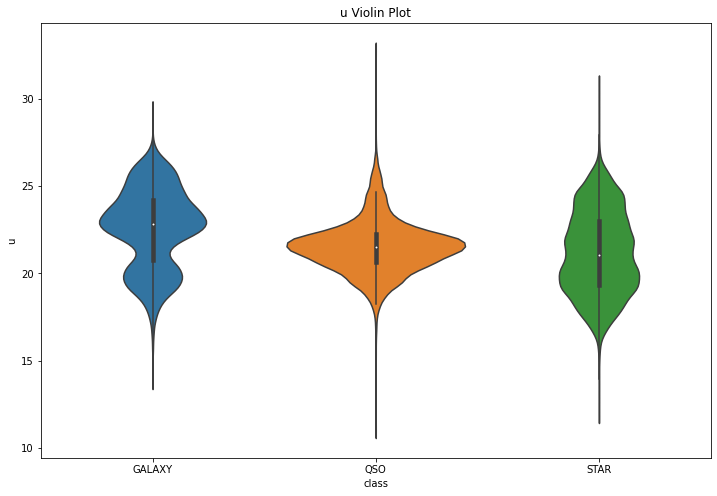

In [20]:
violin_plotter(by = "class", variable = "u", data = stellar)

### Red Filter Readings Distribution

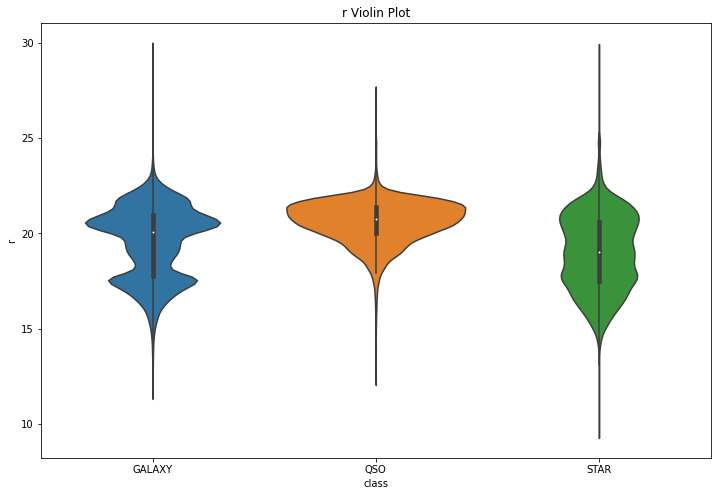

In [21]:
violin_plotter(by = "class", variable = "r", data = stellar)

### Green Filter Readings Distribution

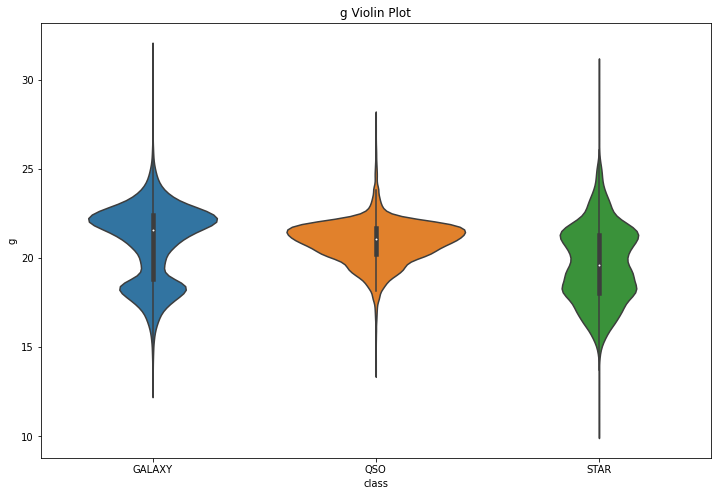

In [22]:
violin_plotter(by = "class", variable = "g", data = stellar)

### Infrared Filter Readings Distribution by Class

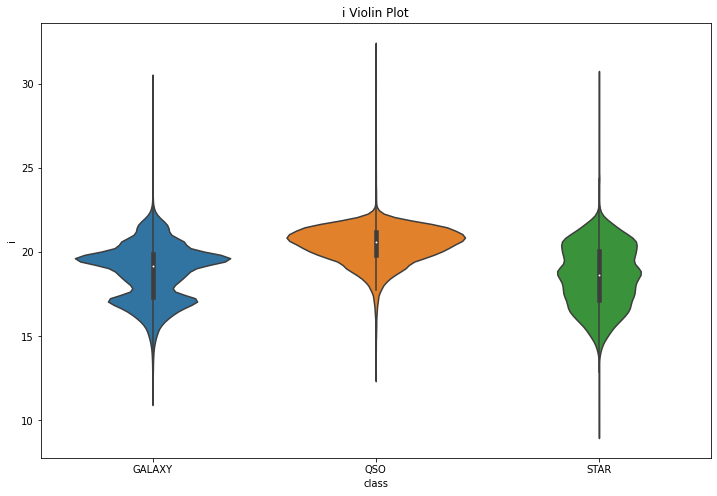

In [23]:
violin_plotter(by = "class", variable = "i", data = stellar)

### Redshift Readings Distribution

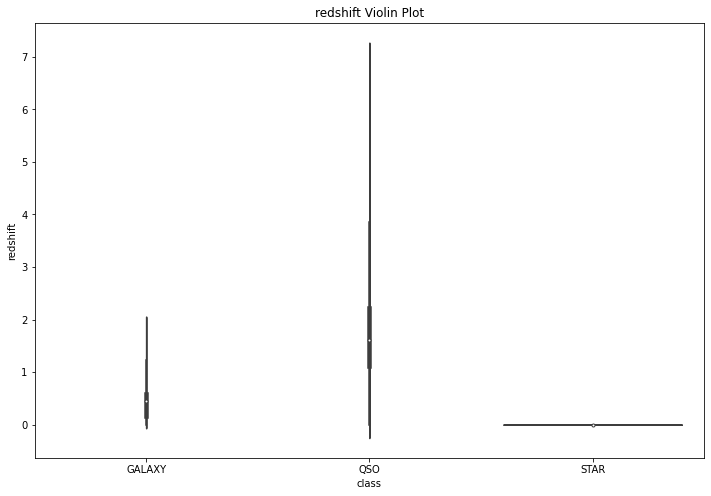

In [24]:
violin_plotter(by ="class",variable = "redshift", data = stellar)

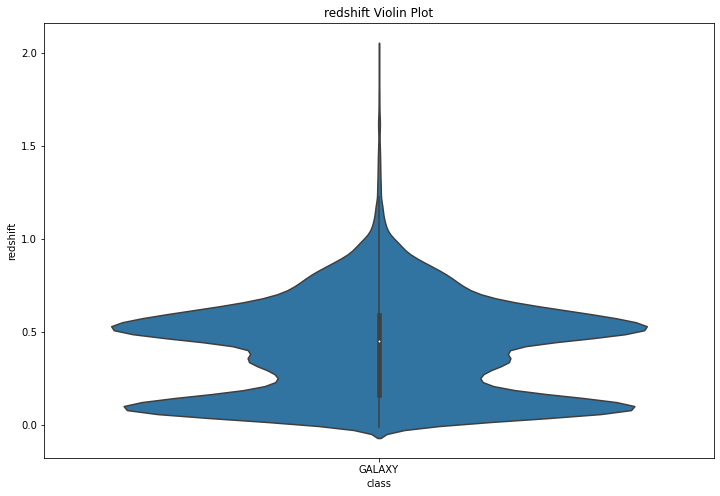

In [25]:
violin_plotter(by ="class",variable = "redshift", data = stellar[stellar["class"] == "GALAXY"])

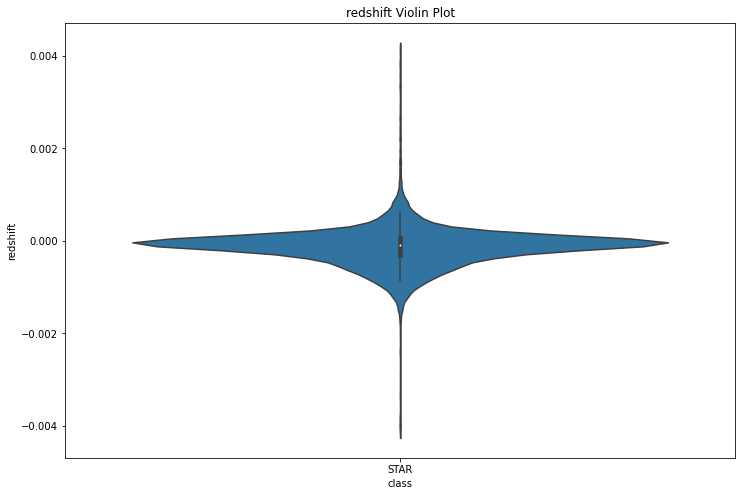

In [26]:
violin_plotter(by ="class",variable = "redshift", data = stellar[stellar["class"] == "STAR"])

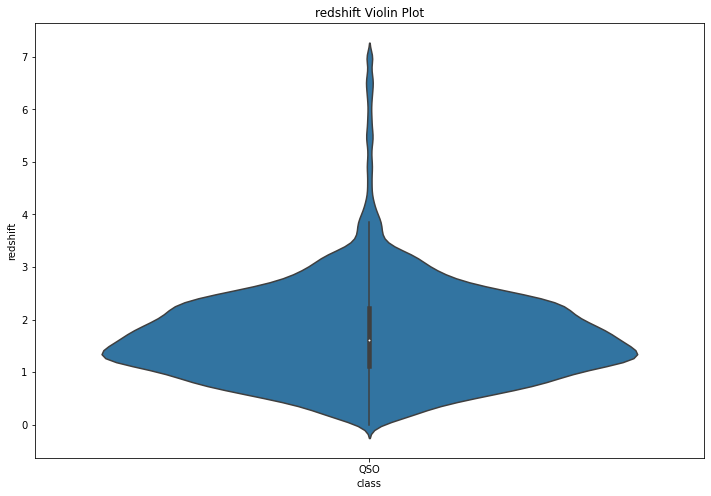

In [27]:
violin_plotter(by ="class",variable = "redshift", data = stellar[stellar["class"] == "QSO"])

From the above distributions it is quite apparent that the selected features all have different distribution by class of the stellar object.
And hence, can and should be considered for classification.

### Taking a quick look at the alpha and delta distributions and seeing if they vary by class

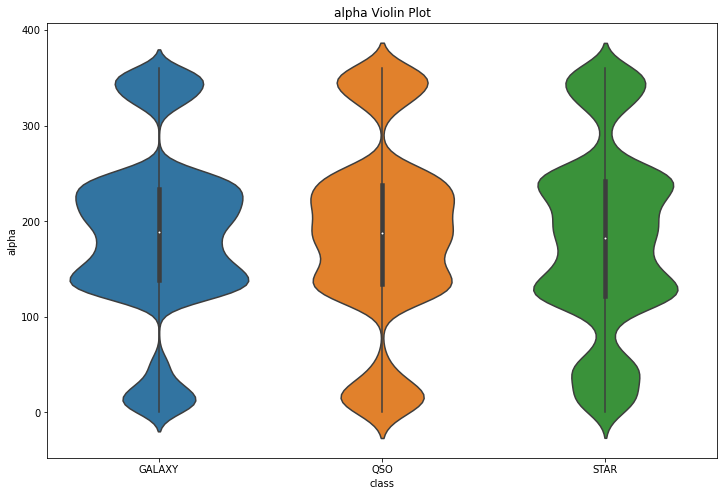

In [28]:
violin_plotter(by ="class",variable = "alpha", data = stellar)

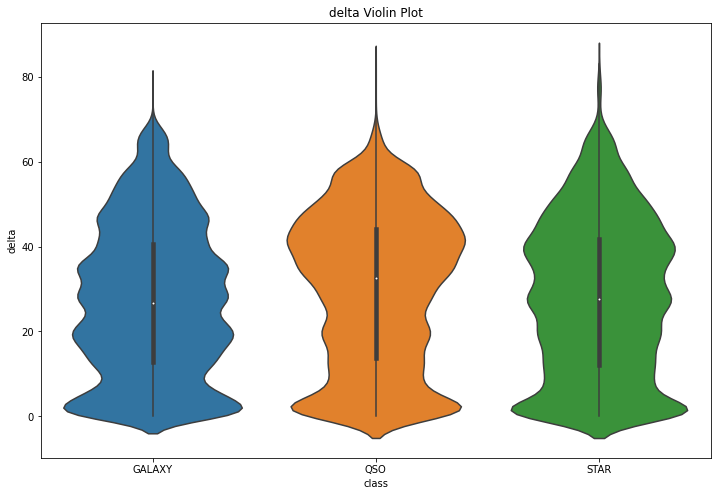

In [29]:
violin_plotter(by ="class",variable = "delta", data = stellar)

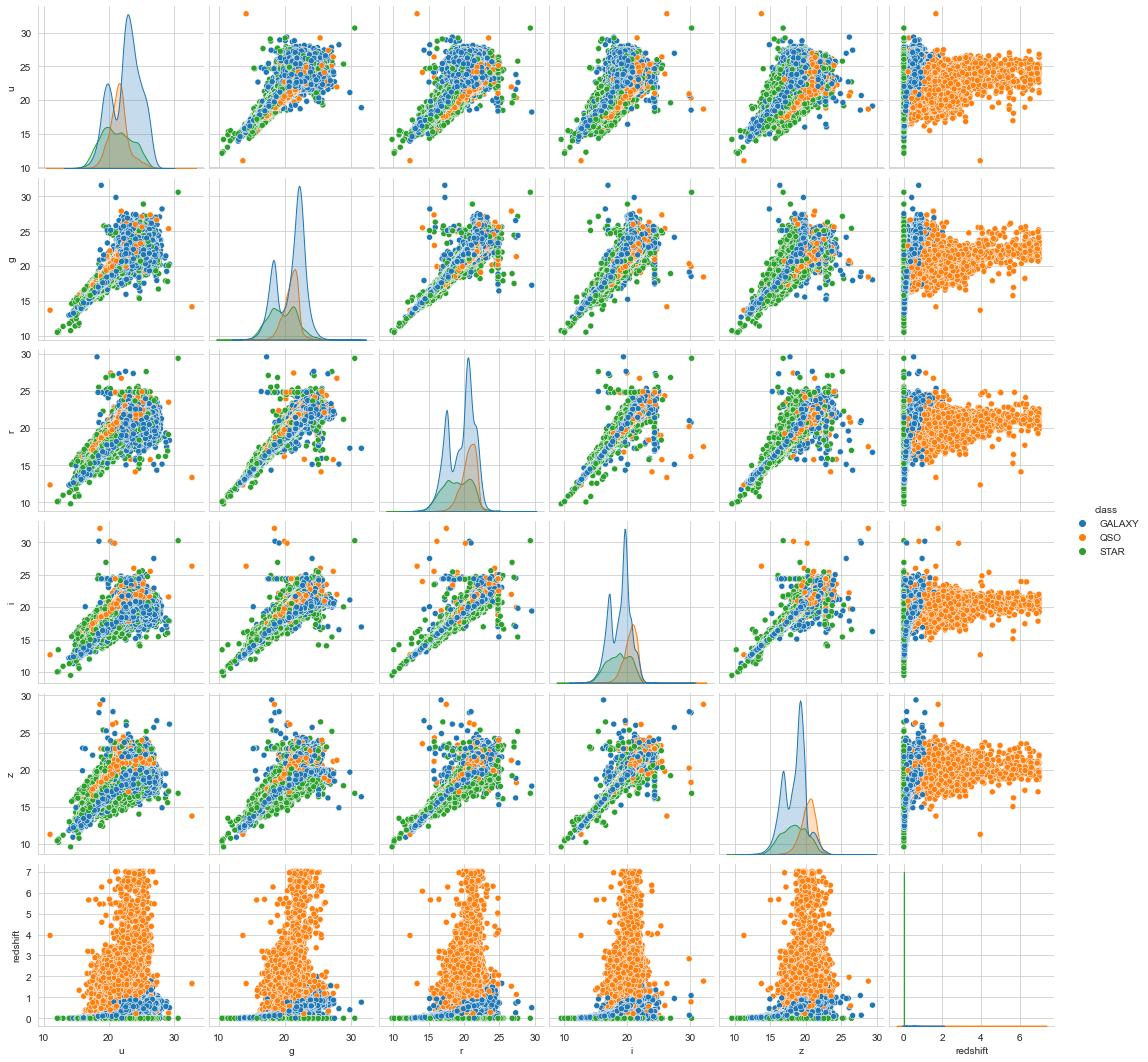

In [36]:
pairplot_vars = features + ["class"]
sns.pairplot(data = stellar[pairplot_vars], hue = "class")
plt.show()

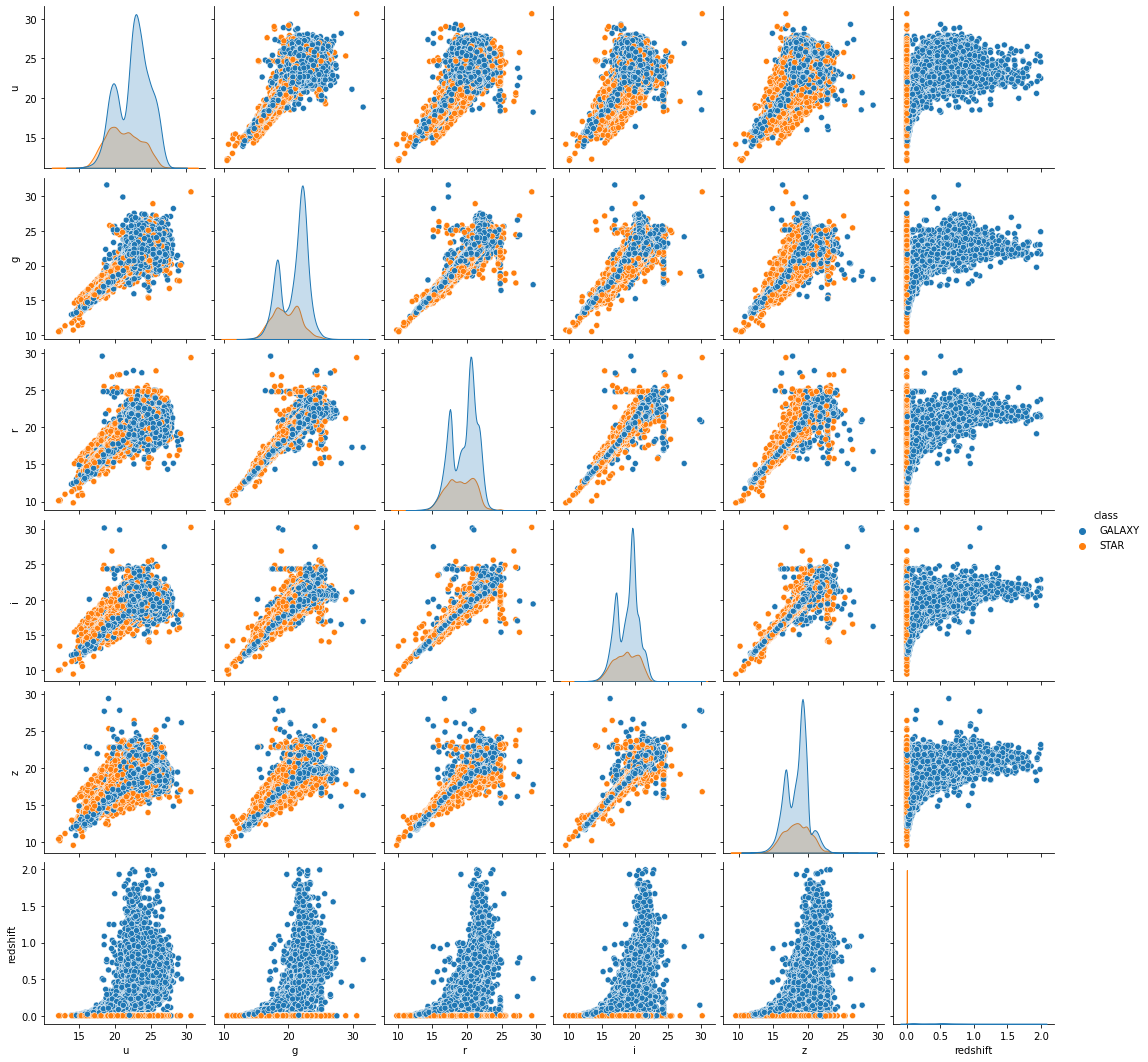

In [31]:
sns.pairplot(data = stellar.loc[stellar['class'].isin(["GALAXY","STAR"]),pairplot_vars], hue = "class")
plt.show()

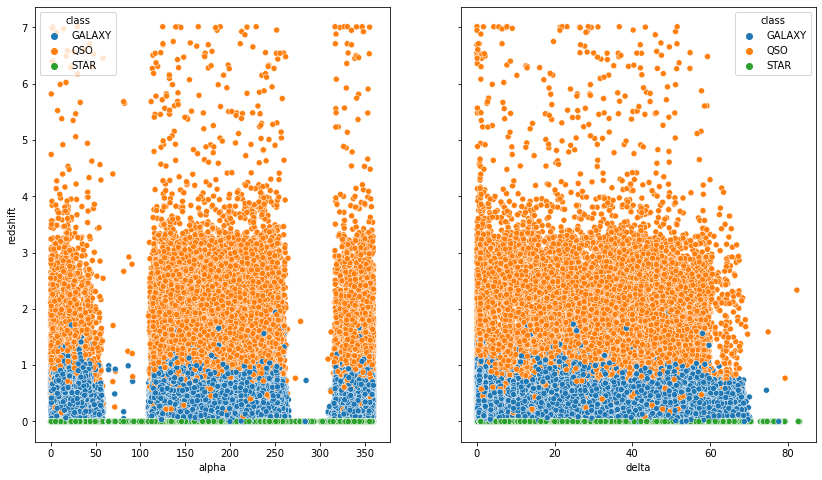

In [32]:
fig, ax = plt.subplots(1,2, sharey = True, figsize = (14,8))
sns.scatterplot(x = "alpha", y = "redshift", data = stellar, hue = "class", ax = ax[0])
sns.scatterplot(x = "delta", y = "redshift", data = stellar, hue = "class", ax = ax[1])
plt.show()

## Class Distribution

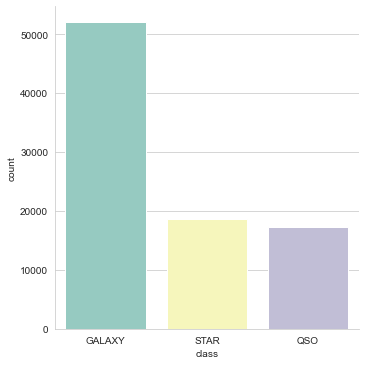

In [33]:
sns.set_style("whitegrid")
sns.catplot(x = "class", data = stellar, kind = "count", order = stellar['class'].value_counts().index, palette = "Set3")
plt.show()


There is class imbalance. But the number of instances of STAR adn QSO classes are enough to consider stratified train test split rather than introduces samples through a method such as SMOTE.


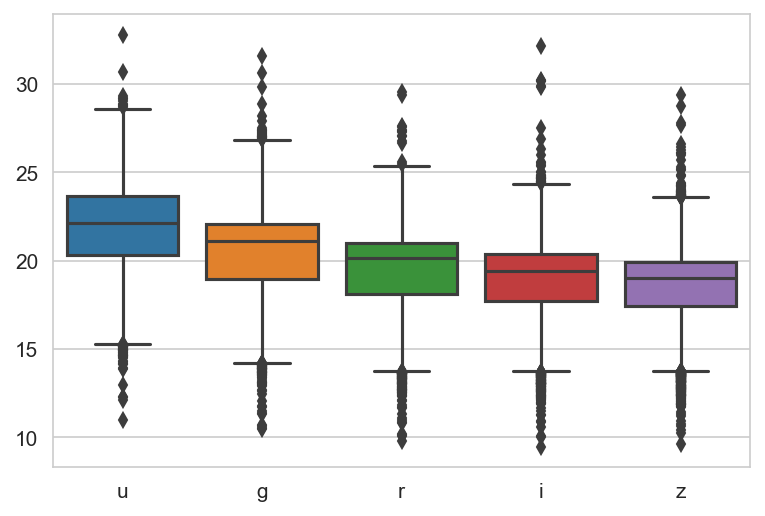

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=150)

sns.boxplot(data = stellar_features[['u','g','r','i','z']])
plt.show()


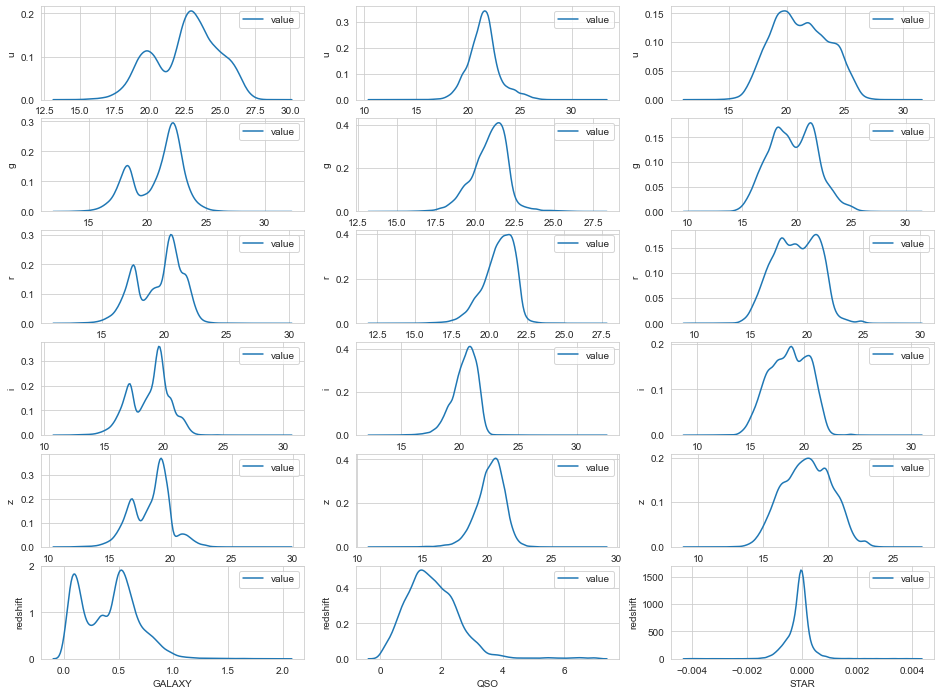

In [44]:
stellar_features_long = stellar_features.melt(id_vars = "class", value_vars = features, var_name="feature", value_name = "value")

classes = stellar_features["class"].unique()

fig, ax = plt.subplots(6,3)
fig.set_size_inches([16, 12])

for i in range(6):
    for j in range(3):
        sns.kdeplot(data = stellar_features_long[stellar_features_long["feature"].isin([features[i]]) & \
                                                stellar_features_long["class"].isin([classes[j]]) ],ax = ax[i,j])
        ax[i,j].set(xlabel = classes[j], ylabel = features[i])
#sns.kdeplot(x = "value", kind = "kde", data = stellar_features_long, col = "class", row = "feature")
plt.show()



In [40]:
stellar.info()
stellar_features = stellar[features + ['class']]
features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87939 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       87939 non-null  float64
 1   alpha        87939 non-null  float64
 2   delta        87939 non-null  float64
 3   u            87939 non-null  float64
 4   g            87939 non-null  float64
 5   r            87939 non-null  float64
 6   i            87939 non-null  float64
 7   z            87939 non-null  float64
 8   run_ID       87939 non-null  int64  
 9   rerun_ID     87939 non-null  int64  
 10  cam_col      87939 non-null  int64  
 11  field_ID     87939 non-null  int64  
 12  spec_obj_ID  87939 non-null  float64
 13  class        87939 non-null  object 
 14  redshift     87939 non-null  float64
 15  plate        87939 non-null  int64  
 16  MJD          87939 non-null  int64  
 17  fiber_ID     87939 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

['u', 'g', 'r', 'i', 'z', 'redshift']

In [42]:
stellar.to_csv("stellar.csv")
stellar_features.to_csv("stellar_features.csv")